# Analisis Pengelompokkan Provinsi di Indonesia Berdasarkan Kasus TBC dan Faktor Lingkungan dengan Metode Fuzzy C-Means
Pada analisis ini digunakan data yang bersumber dari  Kemenkes RI dan BMKG dengan variabel sebagai berikut :
* Kasus TBC (X1)
* Kepadatan Penduduk (X2)
* Suhu Rata-rata (X3)
*  Rata-rata (X4)
* Lama Penyinaran Matahari (X5)

In [1]:
## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## for geospatial
import folium
import geopy

## for machine learning
from skfuzzy import cluster as fuzz
import skfuzzy as fuzz
from scipy.stats import gaussian_kde,zscore,chi2,f_oneway
from sklearn import preprocessing, cluster
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from factor_analyzer import FactorAnalyzer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel(r"D:\Kuliah\Semester 6\Biostatistika\Fuzzy C Means.xlsx")
df.columns.tolist()

['Provinsi',
 'Kasus TBC',
 'Kepadatan Penduduk (per km2)',
 'Suhu rata-rata',
 'Kelembaban rata-rata',
 'Lama penyinaran matahari']

In [3]:
df

,Provinsi,Kasus TBC,Kepadatan Penduduk (per km2),Suhu rata-rata,Kelembaban rata-rata,Lama penyinaran matahari
0,Aceh,6974,94,28.58,76.48,5.10
1,Sumatera Utara,22169,210,28.83,77.83,4.50
2,Sumatera Barat,8216,133,27.08,81.18,4.51
3,Riau,9244,73,28.62,76.21,4.52
4,Jambi,3598,74,27.15,86.33,4.21
5,Sumatera Selatan,13611,99,29.41,81.17,4.07
6,Bengkulu,1806,101,28.42,77.11,5.95
7,Lampung,11874,265,28.52,77.61,4.86
8,Kep. Bangka Belitung,1522,88,28.08,83.30,3.74
9,Kepulauan Riau,4021,252,27.53,83.58,4.51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provinsi                      34 non-null     object 
 1   Kasus TBC                     34 non-null     int64  
 2   Kepadatan Penduduk (per km2)  34 non-null     int64  
 3   Suhu rata-rata                34 non-null     float64
 4   Kelembaban rata-rata          34 non-null     float64
 5   Lama penyinaran matahari      34 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.7+ KB


In [5]:
# Mengatur kolom 'Provinsi' sebagai index
df.set_index('Provinsi', inplace=True)

In [6]:
# Melihat Statistik Dataframe secara umum
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Kasus TBC,34.0,11505.441176,17777.081352,283.00,2768.2500,5111.000,11216.5000,91368.00
Kepadatan Penduduk (per km2),34.0,772.823529,2899.267373,10.00,55.7500,100.500,261.7500,17031.00
Suhu rata-rata,34.0,28.004118,0.924430,24.99,27.4350,28.180,28.5875,29.41
Kelembaban rata-rata,34.0,80.395588,3.247040,73.66,77.8625,79.920,83.5100,86.33
Lama penyinaran matahari,34.0,4.989118,0.852260,3.74,4.3875,4.835,5.5000,7.79


Asumsi analisis cluster harus memenuhi dengan tidak terjadi multikolinearitas yaitu tidak terdapat korelasi antar variabel, dimana untuk mengetahui asumsi tersebut terpenuhi atau tidak maka harus dilakukan pengujian asumsi tidak terjadi multikolinearitas.

Kriteria pengujian :
* Jika nilai VIF < 10 atau nilai Tolerance > 0,01, maka dinyatakan tidak terjadi multikolinearitas.
* Jika nilai VIF > 10 atau nilai Tolerance < 0,01, maka dinyatakan terjadi multikolinearitas.

In [7]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menambahkan kolom konstanta untuk model OLS
X = sm.add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,4222.276014
1,Kasus TBC,1.243022
2,Kepadatan Penduduk (per km2),1.221639
3,Suhu rata-rata,1.621145
4,Kelembaban rata-rata,1.663306
5,Lama penyinaran matahari,1.183897


Dari tabel output disamping, dari seruluh variabel didapatkan nilai VIF < 10 maka data dinyatakan tidak terjadi multikolinieritas.

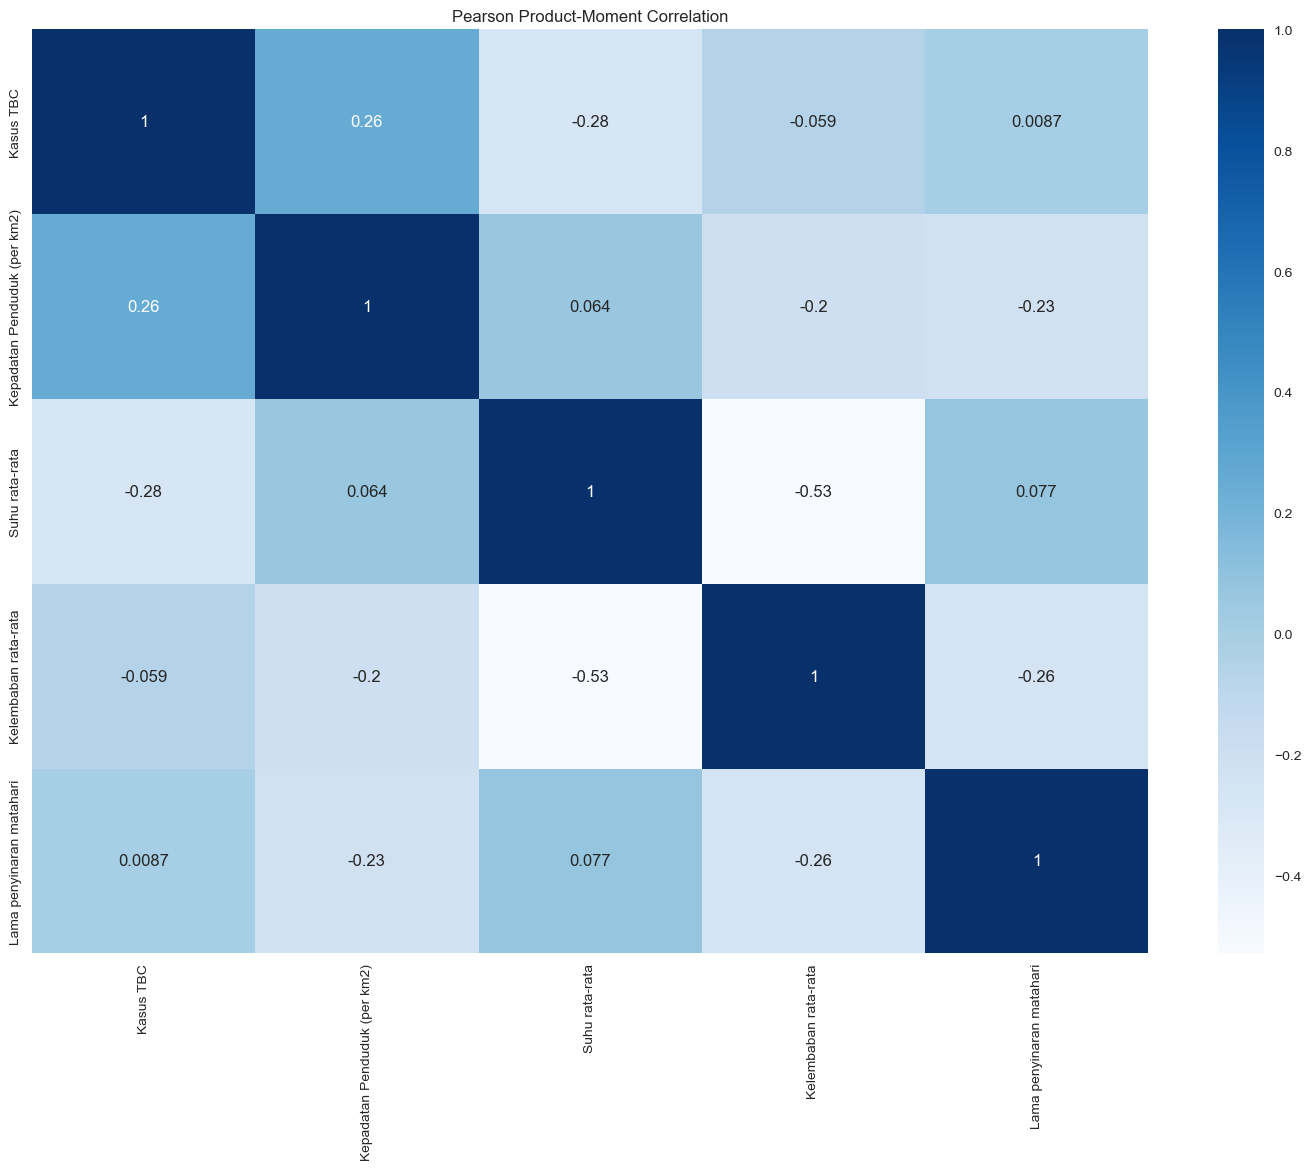

In [8]:
# Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=90)
plt.title("Pearson Product-Moment Correlation")
plt.show()

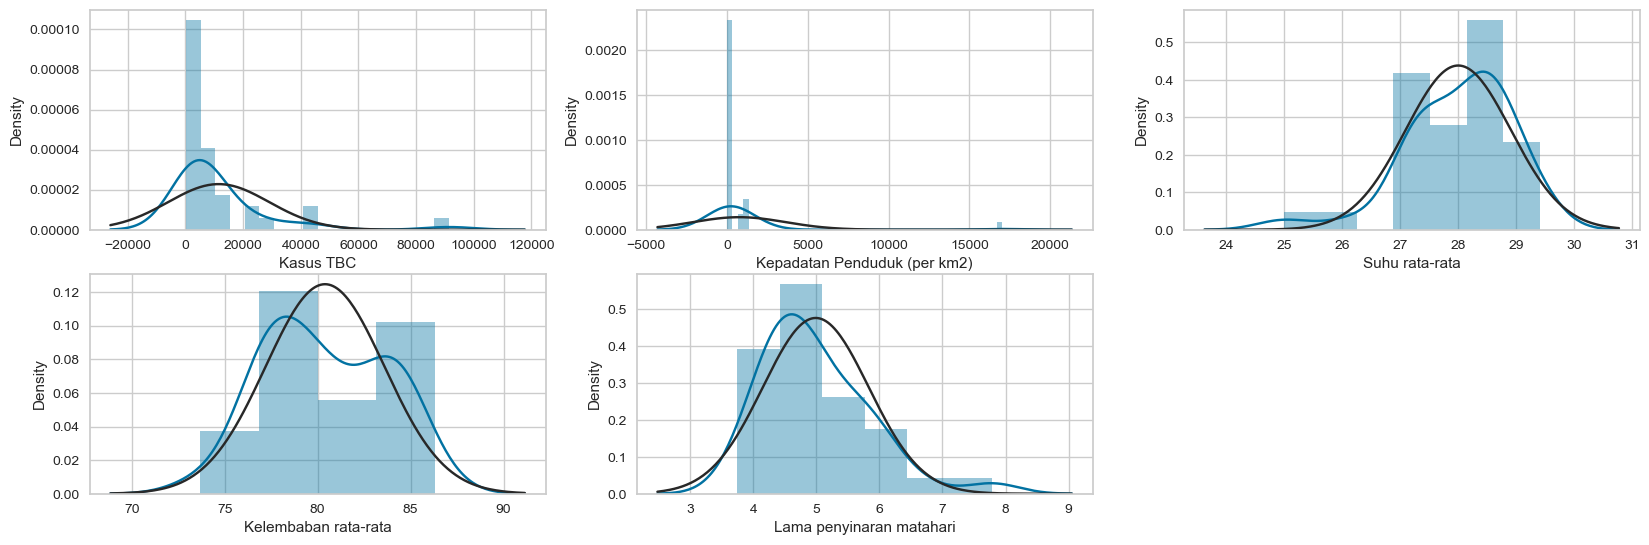

In [9]:
from scipy.stats import norm

plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.distplot(df[col], ax=ax, fit=norm)
    plt.xlabel(col)
plt.show()

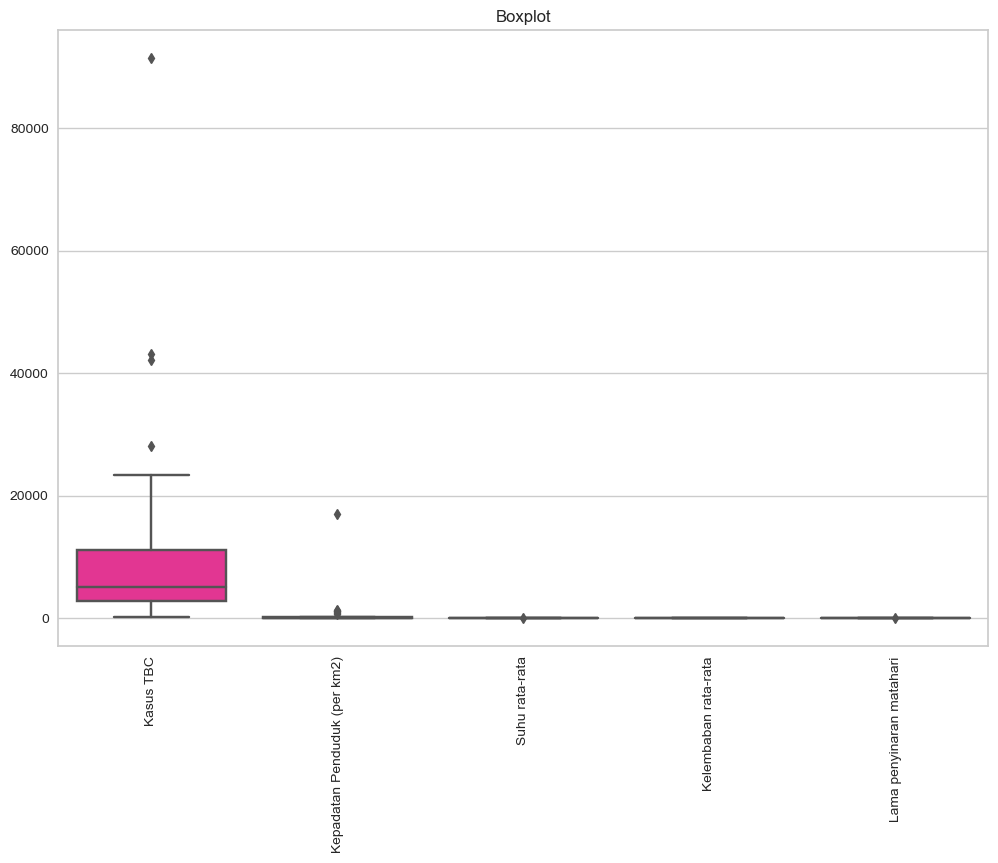

In [10]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(df, showfliers=True, color='#FF1994')  # Menghilangkan pencilan untuk melihat lebih jelas
plt.title('Boxplot')
plt.xticks(rotation='vertical')  # Memutar label sumbu x
plt.show()

In [11]:
# Transformasi data menggunakan zscore
df_t = df.copy().apply(zscore,ddof=1)
df_t.head(10)

,Kasus TBC,Kepadatan Penduduk (per km2),Suhu rata-rata,Kelembaban rata-rata,Lama penyinaran matahari
Provinsi,,,,,
Aceh,-0.254904,-0.234136,0.622960,-1.205895,0.130104
Sumatera Utara,0.599849,-0.194126,0.893397,-0.790131,-0.573906
Sumatera Barat,-0.185038,-0.220685,-0.999662,0.241577,-0.562173
Riau,-0.127211,-0.241379,0.666229,-1.289047,-0.550439
Jambi,-0.444811,-0.241035,-0.923940,1.827637,-0.914178
Sumatera Selatan,0.118442,-0.232412,1.520810,0.238498,-1.078447
Bengkulu,-0.545615,-0.231722,0.449880,-1.011872,1.127452
Lampung,0.020732,-0.175156,0.558055,-0.857885,-0.151500
Kep. Bangka Belitung,-0.561591,-0.236206,0.082086,0.894480,-1.465653


# Penentuan Jumlah Cluster Optimal
Dalam analisis ini digunakan nilai silhouette yang tertinggi untuk menentukan jumlah klaster yang optimal untuk digunakan dalam analisis. Diperoleh hasil perhitungan nilai silhouette dapat dilihat pada grafik disamping.

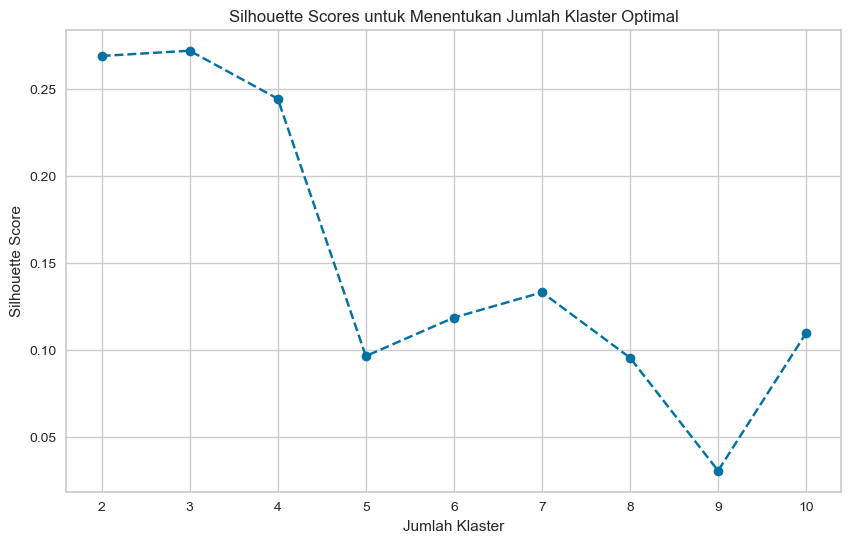

In [12]:
# Menentukan jumlah klaster optimal menggunakan Silhouette Score
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df_t.T, n_clusters, 2, error=0.005, maxiter=1000)
    cluster_labels = np.argmax(u, axis=0)
    silhouette_avg = silhouette_score(df_t, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualisasi Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
# Menampilkan jumlah klaster optimal
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Jumlah klaster optimal berdasarkan Silhouette Score adalah: {optimal_clusters}')

Jumlah klaster optimal berdasarkan Silhouette Score adalah: 3


In [14]:
def calculate_silhouette(df_t, clusters):
    results = []
    for n_clusters in clusters:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            df_t.T, n_clusters, 2, error=0.005, maxiter=1000
        )
        cluster_membership = np.argmax(u, axis=0)
        silhouette_avg = silhouette_score(df_t, cluster_membership)
        results.append((n_clusters, silhouette_avg))
    return results

# Tentukan rentang jumlah cluster yang akan dievaluasi
clusters_range = range(2, 6)

# Hitung Silhouette Coefficient untuk setiap jumlah cluster
silhouette_scores = calculate_silhouette(df_t, clusters_range)

# Cetak hasilnya
for n_clusters, silhouette_avg in silhouette_scores:
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

Silhouette Score for 2 clusters: 0.2691503709654967
Silhouette Score for 3 clusters: 0.2721566437394151
Silhouette Score for 4 clusters: 0.244534763540552
Silhouette Score for 5 clusters: 0.1336833901004269


Pada grafik silhoutte score diatas menunjukkan bahwa jumlah klaster dengan nilai tertinggi adalah 3 klaster. Sehingga, selanjutnya akan dilakukan pengelompokkan sebanyak 3 klaster.

# Fuzzy C-Means Clustering
Fuzzy C-Means Clustering (FCM), atau dikenal juga sebagai Fuzzy Isodata merupakan salah satu metode clustering yang merupakan bagian dari metode Hard K-Means. FCM menggunakan model pengelompokan fuzzy sehingga data dapat menjadi anggota dari semua kelas atau cluster terbentuk dengan derajat atau tingkat keanggotaan yang berbeda antara 0 hingga 1. Tingkat keberadaan data dalam suatu kelas atau cluster ditentukan oleh derajat keanggotaannya.

In [15]:
# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    df_t.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

In [16]:
# Hardening the fuzzy partition
cluster_membership = np.argmax(u, axis=0)

In [17]:
# Adding cluster information to the dataframe
df_t['Cluster'] = cluster_membership

In [18]:
df_t

,Kasus TBC,Kepadatan Penduduk (per km2),Suhu rata-rata,Kelembaban rata-rata,Lama penyinaran matahari,Cluster
Provinsi,,,,,,
Aceh,-0.254904,-0.234136,0.622960,-1.205895,0.130104,2
Sumatera Utara,0.599849,-0.194126,0.893397,-0.790131,-0.573906,2
Sumatera Barat,-0.185038,-0.220685,-0.999662,0.241577,-0.562173,1
Riau,-0.127211,-0.241379,0.666229,-1.289047,-0.550439,2
Jambi,-0.444811,-0.241035,-0.923940,1.827637,-0.914178,1
Sumatera Selatan,0.118442,-0.232412,1.520810,0.238498,-1.078447,2
Bengkulu,-0.545615,-0.231722,0.449880,-1.011872,1.127452,0
Lampung,0.020732,-0.175156,0.558055,-0.857885,-0.151500,2
Kep. Bangka Belitung,-0.561591,-0.236206,0.082086,0.894480,-1.465653,1


In [19]:
# Menganalisis karakteristik setiap klaster
cluster_characteristics = df_t.groupby('Cluster').mean()

# Menampilkan karakteristik setiap klaster dalam bentuk tabel
cluster_characteristics

,Kasus TBC,Kepadatan Penduduk (per km2),Suhu rata-rata,Kelembaban rata-rata,Lama penyinaran matahari
Cluster,,,,,
0,-0.031140,-0.138940,0.675502,-0.644064,1.435875
1,0.061933,-0.193535,-0.890715,0.916918,-0.156529
2,-0.049929,0.283236,0.595500,-0.640646,-0.604594


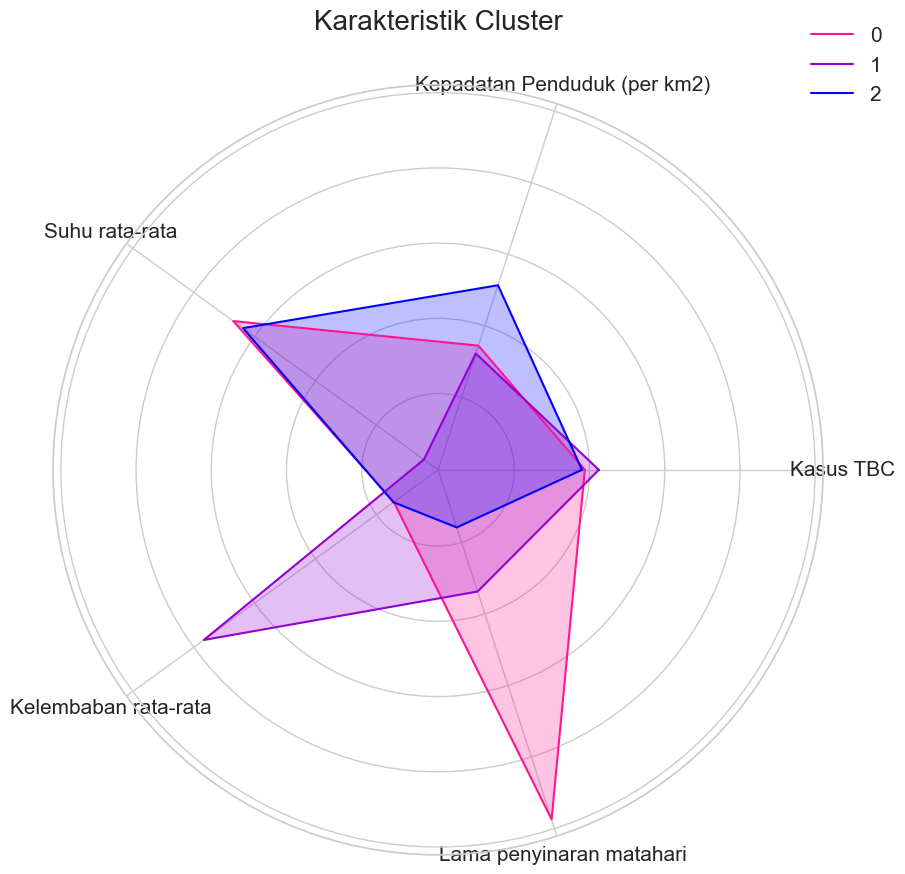

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Jumlah klaster
num_clusters = 3

# Data karakteristik klaster
cluster_data = cluster_characteristics.values

# Label untuk tiap karakteristik
labels = cluster_characteristics.columns

# Nama klaster dari indeks DataFrame
cluster_names = cluster_characteristics.index

# Jumlah karakteristik
num_vars = len(labels)

# Mengatur sudut dan posisi label
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Menambahkan titik awal untuk menggambar bentuk tertutup
cluster_data = np.concatenate((cluster_data, cluster_data[:, [0]]), axis=1)
angles += angles[:1]

# Membuat radar chart
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(10, 10))

# Warna untuk setiap klaster
colors = ['deeppink', 'darkviolet', 'blue']

# Menggambar garis untuk setiap klaster dengan warna yang berbeda
for i in range(num_clusters):
    ax.fill(angles, cluster_data[i], color=colors[i], alpha=0.25)
    ax.plot(angles, cluster_data[i], color=colors[i], linewidth=1.5, linestyle='solid', label=cluster_names[i])

# Menambahkan legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=15)

# Mengatur label pada radar chart
ax.set_yticklabels([])
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=15)

plt.title('Karakteristik Cluster', fontsize=20, pad=40)
plt.show()

Berdasarkan perhitungan rata-rata variabel pada masing-masing cluster menunjukkan bahwa klaster 1  adalah kumpulan provinsi dengan suhu rata-rata dan lama penyinaran matahari yang lebih tinggi dibandingkan klaster lain. Klaster 2 merupakan kelompok dengan rata-rata kasus TBC dan kelembaban rata-rata yang tinggi dibandingkan klaster lain. Sedangkan klaster 3 merupakan kelompok provinsi dengan kepadatan penduduk yang tinggi. 

In [21]:
# Mengelompokkan provinsi berdasarkan cluster
cluster_1_provinces = df_t[df_t["Cluster"] == 0].index.tolist()
cluster_2_provinces = df_t[df_t["Cluster"] == 1].index.tolist()
cluster_3_provinces = df_t[df_t["Cluster"] == 2].index.tolist()

# Membuat dataframe baru dengan dua kolom cluster
max_len = max(len(cluster_1_provinces), len(cluster_2_provinces))
cluster_1_provinces.extend([None] * (max_len - len(cluster_1_provinces)))
cluster_2_provinces.extend([None] * (max_len - len(cluster_2_provinces)))
cluster_3_provinces.extend([None] * (max_len - len(cluster_3_provinces)))

df_clusters = pd.DataFrame({
    'Cluster 1': cluster_1_provinces,
    'Cluster 2': cluster_2_provinces,
    'Cluster 3': cluster_3_provinces
})

df_clusters

,Cluster 1,Cluster 2,Cluster 3
0,Bengkulu,Sumatera Barat,Aceh
1,Jawa Tengah,Jambi,Sumatera Utara
2,Bali,Kep. Bangka Belitung,Riau
3,Nusa Tenggara Barat,Kepulauan Riau,Sumatera Selatan
4,Nusa Tenggara Timur,Jawa Barat,Lampung
5,Sulawesi Selatan,Jawa Timur,DKI Jakarta
6,Maluku,Kalimantan Tengah,DI Yogyakarta
7,None,Kalimantan Timur,Banten
8,None,Kalimantan Utara,Kalimantan Barat
9,None,Sulawesi Tengah,Kalimantan Selatan


# Kesimpulan
Hasil pengelompokkan provinsi di Indonesia berdasarkan data kasus TBC dan faktor lingkungan menggunakan metode Fuzzy C-Means menunjukkan jumlah klaster optimal adalah sebanyak 3 klaster dengan jumlah anggota klaster 1 sebanyak 7 provinsi, klaster 2 sebanyak 14 provinsi, dan klaster 3 sebanyak 13 provinsi. Nilai silhouette yang dihasilkan adalah sebesar 0.2721566. 